In [1]:
!pip install netCDF4

In [2]:
import netCDF4 as nc
from scipy import interpolate
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
path = "../data/20210810120000-C3S-L4_GHRSST-SSTdepth-OSTIA-GLOB_ICDR2.0-v02.0-fv01.0.nc"

In [4]:
nc_file = nc.Dataset(path, 'r')

lat_var = nc_file['lat']
long_var = nc_file["lon"]

latitude_data = lat_var[:].data
longitude_data = long_var[:].data

nc_file.close()

In [5]:
path1 = "../data/"

In [6]:
ds = nc.Dataset(path)

In [7]:
variable_names = ds.variables.keys()

In [8]:
variable_names

dict_keys(['time', 'lat', 'lon', 'analysed_sst', 'analysis_uncertainty', 'sea_ice_fraction', 'mask'])

In [9]:
variable1 = ds["analysed_sst"]

In [10]:
variable1

<class 'netCDF4._netCDF4.Variable'>
int16 analysed_sst(time, lat, lon)
    long_name: analysed sea surface temperature
    standard_name: sea_water_temperature
    units: kelvin
    coordinates: lon lat
    _FillValue: -32768
    add_offset: 273.15
    scale_factor: 0.01
    valid_min: -300
    valid_max: 4500
    source: AVHRR19_G-C3S-L3U-ICDR-v2.0 AVHRRMTA_G-C3S-L3U-ICDR-v2.0 SLSTRA-C3S-L3U-ICDR-v2.0
unlimited dimensions: 
current shape = (1, 3600, 7200)
filling on

In [11]:
aa = ds.variables['analysed_sst']

In [12]:
aa = aa[:]

In [13]:
bb = aa.data[0]

In [14]:
bb.shape

(3600, 7200)

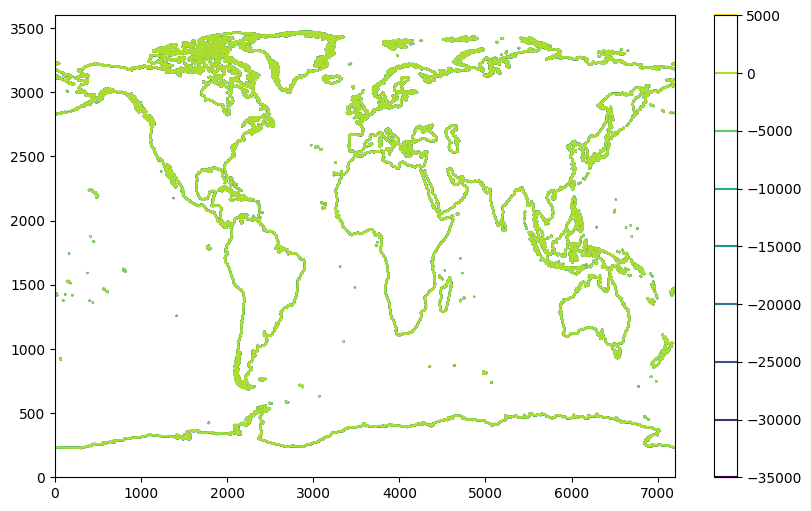

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.contour(bb)
plt.colorbar()

In [16]:
import os 
folder_path = "../data/"
file_list = os.listdir(folder_path)

In [85]:
file_list[100][0:8]

'20010412'

In [88]:
from datetime import datetime

#date_str = '20010103'
#date_object = datetime.strptime(date_str, '%Y%m%d')
date = []
for ii in range(len(file_list)-1):
    date.append(datetime.strptime(file_list[ii][0:8], "%Y%m%d"))

In [90]:
date[0]

datetime.datetime(2001, 1, 1, 0, 0)

In [18]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  16


305.19998 270.57


(0.0, 3520.0)

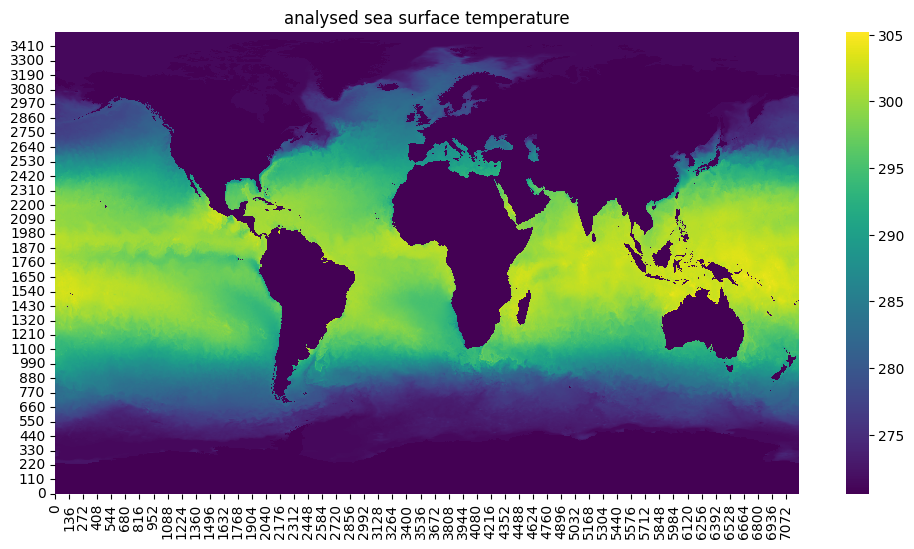

In [19]:
import seaborn as sns
ds = nc.Dataset(folder_path+file_list[3])
aa = ds.variables['analysed_sst'][:].reshape(3600,7200)
print(np.max(aa), np.min(aa))
plt.figure(figsize=(12,6))
sns.heatmap(aa, cmap='viridis', vmin=np.min(aa), vmax=np.max(aa))

plt.title("analysed sea surface temperature")

plt.ylim(0,3520)


In [21]:
!pip install numba


305.58 270.44


(1000.0, 2420.0)

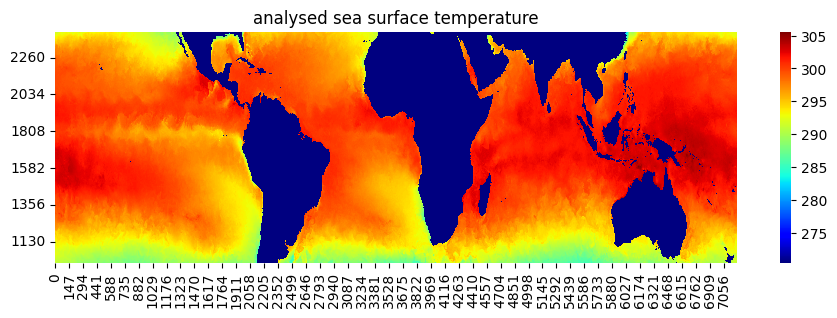

In [73]:
import seaborn as sns
ds = nc.Dataset(folder_path+file_list[0])
aa = ds.variables['analysed_sst'][:].reshape(3600,7200)
print(np.max(aa), np.min(aa))
plt.figure(figsize=(11,3))
sns.heatmap(aa, cmap='jet', vmin=np.min(aa), vmax=np.max(aa))

plt.title("analysed sea surface temperature")

plt.ylim(1000, 2420)


In [ ]:
import multiprocessing as mp
import numpy as np
import netCDF4 as nc
import time

def f1(path):
    results = []
    for p in path:
        data = nc.Dataset(p)
        analyzed_sst = data.variables["analysed_sst"][:]
        results.append(np.average(analyzed_sst))
        data.close()
    return results

if __name__ == "__main__":
    # Define your file_list here

    # Calculate the number of chunks
    num_chunks = 2  # You can adjust the number of chunks
    chunk_size = max(len(file_list) // num_chunks, 1)  # Ensure chunk_size is at least 1
    
    # Split the file_list into chunks for parallel processing
    path_chunks = [file_list[i:i + chunk_size] for i in range(0, len(file_list), chunk_size)]
    
    # Create multiprocessing Pool
    pool = mp.Pool(processes=num_chunks)
    
    start = time.time()
    
    # Apply the function to each chunk in parallel
    results = pool.map(f1, path_chunks)
    
    end = time.time()
    
    # Flatten the results
    flattened_results = [item for sublist in results for item in sublist]
    
    print("Time taken (hours):", (end - start) / 3600)
    print("Average SST values:", flattened_results)


In [21]:
# Record the start time
start_time = time.time()

aa = []
for ii in range(len(file_list)):
    ds = nc.Dataset(folder_path+file_list[ii])
    aa.append(np.average(ds.variables['analysed_sst'][:]))  
    print(ii)
end_time = time.time()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


In [23]:
elapsed_time = (end_time - start_time)/3600

print(f"Execution time: {elapsed_time:.5f} hours")

Execution time: 14.38727 hours


Text(0, 0.5, 'Average Temperature at a depth of 20m')

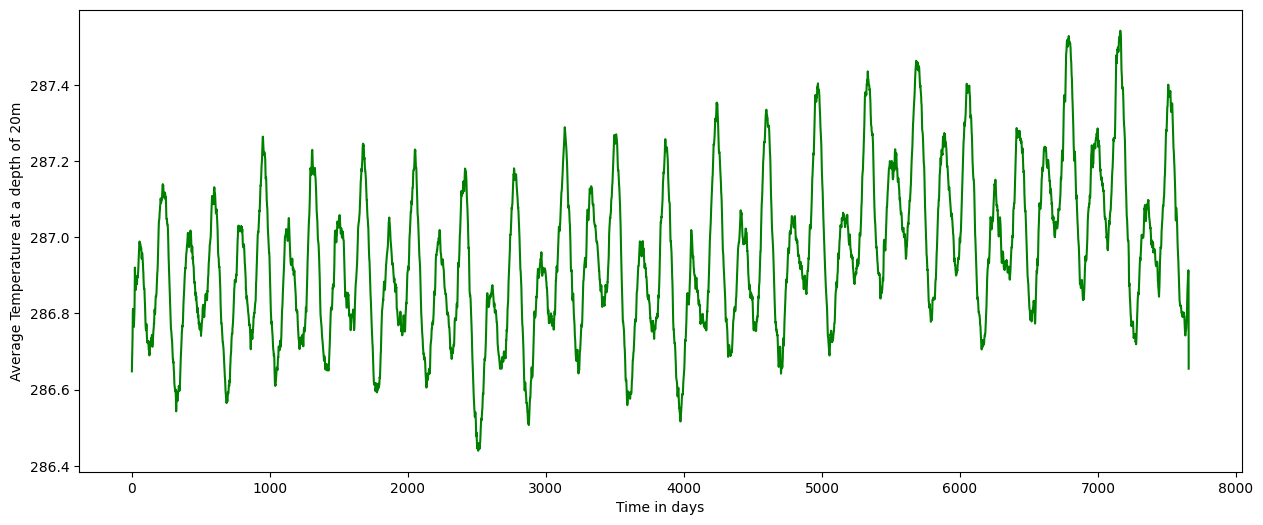

In [24]:
plt.figure(figsize= (15,6))
plt.plot(aa, color = "green")
plt.xlabel("Time in days")
plt.ylabel("Average Temperature at a depth of 20m")

In [25]:
def ff(files):
    ds = nc.Dataset(files)
    aa = ds.variables['analysed_sst'][:].reshape(3600,7200)
    plt.figure(figsize=(12,6))
    plt.pcolor(longitude_data,latitude_data, bb, cmap='viridis')  # cmap specifies the color map
    plt.title("analysed sea surface temperature")
    plt.colorbar() 

Text(0, 0.5, 'Average Temperature at a depth of 20cm')

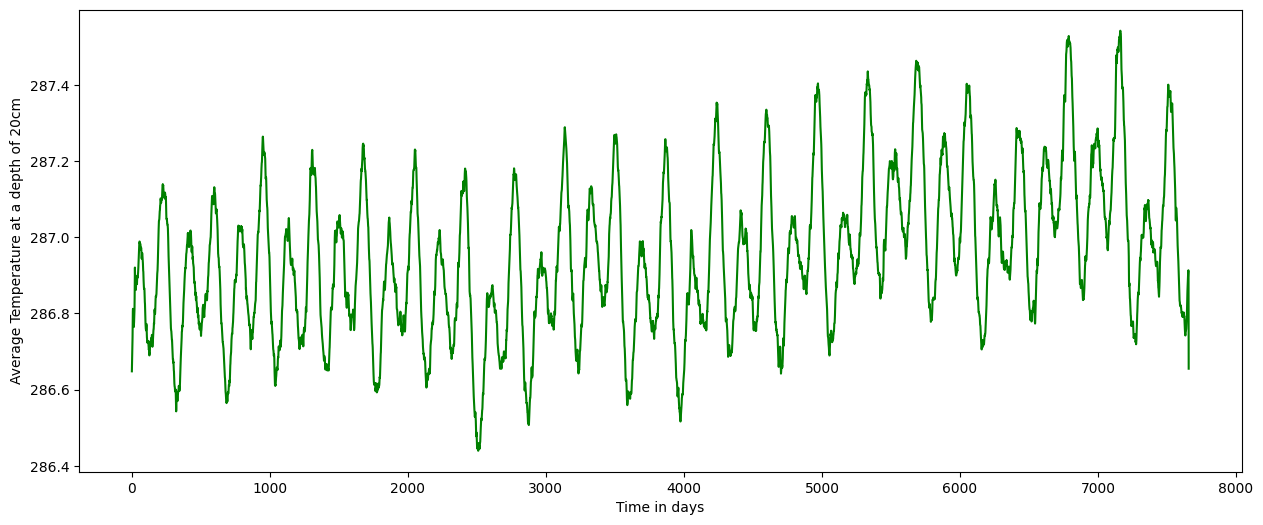

In [27]:
plt.figure(figsize= (15,6))
plt.plot(aa, color = "green")
plt.xlabel("Time in days")
plt.ylabel("Average Temperature at a depth of 20cm")

In [28]:
import pandas as pd
da = pd.read_csv("../csv/Time_series.csv")

In [29]:
da["Series"]

0       286.648127
1       286.655036
2       286.664387
3       286.680378
4       286.702832
           ...    
7653    286.899018
7654    286.906701
7655    286.912329
7656    286.913401
7657    286.911466
Name: Series, Length: 7658, dtype: float64

In [30]:
import pandas as pd
from datetime import datetime, timedelta

# Number of days
num_days = 7658

# Define the start date
start_date = datetime(2001, 1, 1)

# Create a range of dates using a list comprehension
date_list = [start_date + timedelta(days=i) for i in range(num_days)]

# Create a DataFrame with the dates
ds = pd.DataFrame({'Date': date_list})

# Print the DataFrame
print(ds)


           Date
0    2001-01-01
1    2001-01-02
2    2001-01-03
3    2001-01-04
4    2001-01-05
...         ...
7653 2021-12-15
7654 2021-12-16
7655 2021-12-17
7656 2021-12-18
7657 2021-12-19

[7658 rows x 1 columns]


In [31]:
climate = pd.DataFrame({"Date_series": ds["Date"],
                 "Temperature" : da["Series"]})

In [71]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(12,6))
#plt.plot(ds, color = "black")

In [33]:
training = climate[:6000]

In [34]:
testing = climate[6000:]

In [35]:
testing

,Date_series,Temperature
6000,2017-06-06,286.998951
6001,2017-06-07,286.991066
6002,2017-06-08,286.986509
6003,2017-06-09,286.990023
6004,2017-06-10,287.001488
...,...,...
7653,2021-12-15,286.899018
7654,2021-12-16,286.906701
7655,2021-12-17,286.912329
7656,2021-12-18,286.913401


#Time series is always a extrapolation thing (future prediction)


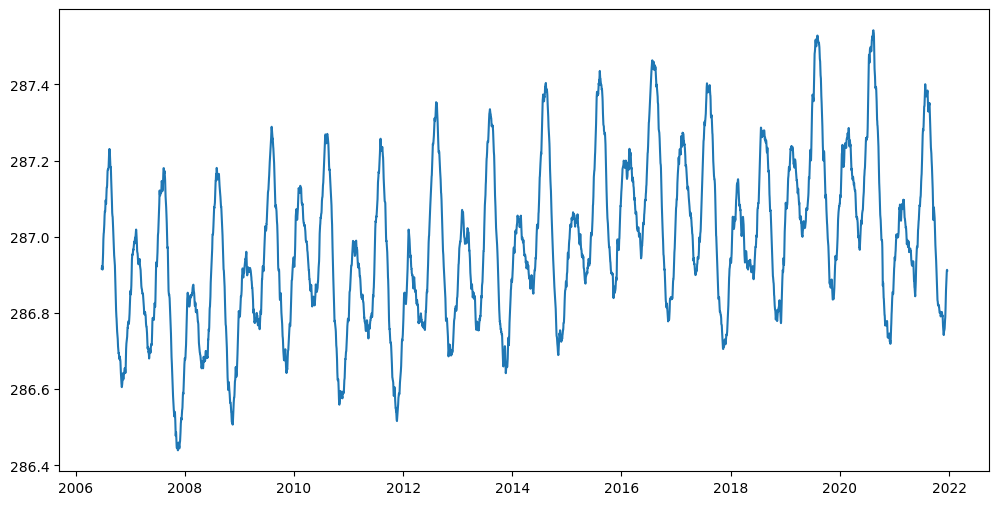

In [77]:
plt.figure(figsize=(12,6))
plt.plot(climate["Date_series"][2001:], climate["Temperature"][2001:])
#for year in range(2006,2022):
 #   plt.axvline(pd.to_datetime(str(year)), color = "k", linestyle = "--")



In [37]:
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()

# ACF

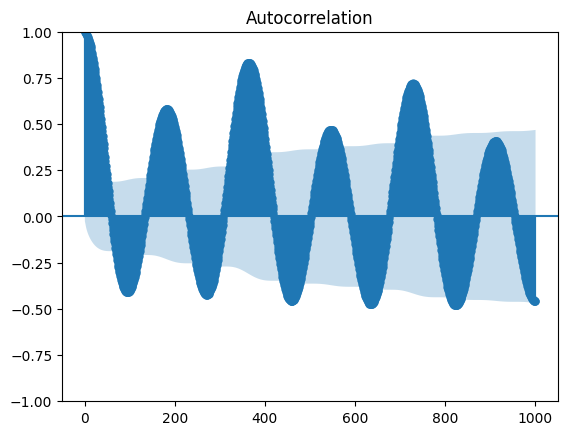

In [38]:
acf_plot = plot_acf(training.Temperature, lags = 1000)

In [39]:
##PACF

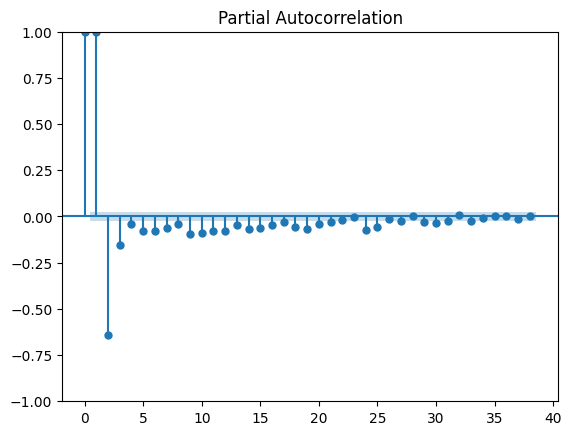

In [40]:
Pacf_plot = plot_pacf(training.Temperature)

In [41]:
round(np.std(training.Temperature[5000:]))

0

In [42]:
round(np.std(testing.Temperature))

0

In [43]:
def generate_ar_process(lags, coefs, length):
    coefs = np.array(coefs)
    series = [np.random.normal() for _ in range(lags)]
    for _ in range(length):
        prev_vals = series[-lags:][::-1]
        new_val = np.sum(np.array(prev_vals)*coefs)+np.random.normal()
        series.append(new_val)
    return np.array(series)

In [44]:
def perform_adf_test(series):
    result = adfuller(series)
    print(result[0])
    print(result[1])

In [45]:
perform_adf_test(testing.Temperature)

-7.228104002613775
2.0279524573508783e-10


In [46]:
##ARMA

In [47]:
model  = ARIMA(training.Temperature, order=(2,0,0))

In [48]:
start = time.time()
model_fit = model.fit()
end = time.time()
print(end-start)

1.810100793838501


In [49]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:                 6000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               23075.426
Date:                Mon, 13 Nov 2023   AIC                         -46142.852
Time:                        12:17:33   BIC                         -46116.054
Sample:                             0   HQIC                        -46133.546
                               - 6000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        286.9171      0.041   7081.100      0.000     286.838     286.997
ar.L1          1.7703      0.007    265.466      0.000       1.757       1.783
ar.L2         -0.7719      0.007   -115.896      0.0

In [50]:
testing.Temperature.index[0]

6000

In [51]:
prediction = model_fit.predict(testing.Temperature.index[0],testing.Temperature.index[-1])

In [52]:
residuals = testing.Temperature-prediction

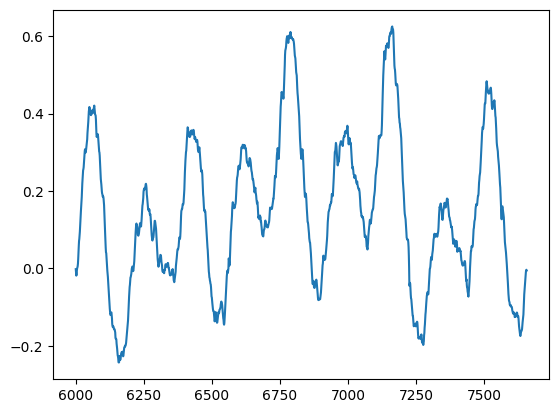

In [53]:
plt.plot(residuals)

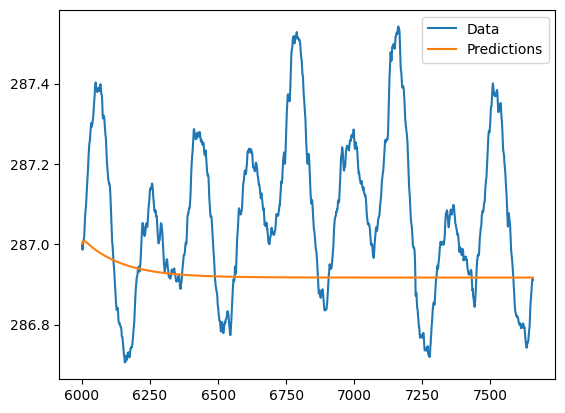

In [54]:
plt.plot(testing.Temperature, label = "Data")
plt.plot(prediction, label = "Predictions")
plt.legend()

In [55]:
print("Mean Absolute error:",np.mean(abs(residuals/testing.Temperature)))

Mean Absolute error: 0.000685677196679628


In [56]:
print("Mean Absolute error:",np.sqrt(np.mean(residuals**2)))

Mean Absolute error: 0.24776208561712665


In [57]:
training.Temperature.loc[:7000-2]

0       286.648127
1       286.655036
2       286.664387
3       286.680378
4       286.702832
           ...    
5995    286.956254
5996    286.963937
5997    286.981506
5998    286.992971
5999    286.997604
Name: Temperature, Length: 6000, dtype: float64

In [58]:
prediction_rolling = pd.Series()

for end_idx in testing.index:

    train_data = climate.Temperature.loc[:end_idx-1] 
    model = ARIMA(train_data, order=(3, 0, 0))
    model_fit = model.fit()
    
    # Make a one-step-ahead prediction for the current end_date
    pred = model_fit.forecast(steps=1)
    print(pred)
    
    # Store the prediction in the Series
    prediction_rolling.loc[end_idx] = pred.loc[end_idx] 
    
# Print or use the rolling predictions as needed
print(prediction_rolling)

    

6000    287.001265
dtype: float64
6001    286.999956
dtype: float64
6002    286.985061
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6003    286.982762
dtype: float64
6004    286.992421
dtype: float64
6005    287.010059
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6006    287.013119
dtype: float64
6007    287.012374
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6008    287.016275
dtype: float64
6009    287.025242
dtype: float64
6010    287.04194
dtype: float64
6011    287.063235
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6012    287.074945
dtype: float64
6013    287.087265
dtype: float64
6014    287.085755
dtype: float64
6015    287.097359
dtype: float64
6016    287.106007
dtype: float64
6017    287.12415
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6018    287.132667
dtype: float64
6019    287.152114
dtype: float64
6020    287.160738
dtype: float64
6021    287.171941
dtype: float64
6022    287.184402
dtype: float64
6023    287.193161
dtype: float64
6024    287.217161
dtype: float64
6025    287.230609
dtype: float64
6026    287.240288
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6027    287.250492
dtype: float64
6028    287.258578
dtype: float64
6029    287.255208
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6030    287.261202
dtype: float64
6031    287.277118
dtype: float64
6032    287.294493
dtype: float64
6033    287.289855
dtype: float64
6034    287.305348
dtype: float64
6035    287.305069
dtype: float64
6036    287.295277
dtype: float64
6037    287.287283
dtype: float64
6038    287.300816
dtype: float64
6039    287.299573
dtype: float64
6040    287.310033
dtype: float64
6041    287.318033
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6042    287.318857
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6043    287.328267
dtype: float64
6044    287.349564
dtype: float64
6045    287.353542
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6046    287.362254
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6047    287.374212
dtype: float64
6048    287.39205
dtype: float64
6049    287.400494
dtype: float64
6050    287.400099
dtype: float64
6051    287.406673
dtype: float64
6052    287.395437
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6053    287.387537
dtype: float64
6054    287.379095
dtype: float64
6055    287.378724
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6056    287.382882
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6057    287.375256
dtype: float64
6058    287.379994
dtype: float64
6059    287.381959
dtype: float64
6060    287.380349
dtype: float64
6061    287.388685
dtype: float64
6062    287.39204
dtype: float64
6063    287.383965
dtype: float64
6064    287.376296
dtype: float64
6065    287.394159
dtype: float64
6066    287.38987
dtype: float64
6067    287.389029
dtype: float64
6068    287.399062
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6069    287.39967
dtype: float64
6070    287.383836
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6071    287.37155
dtype: float64
6072    287.368376
dtype: float64
6073    287.370623
dtype: float64
6074    287.367971
dtype: float64
6075    287.352089
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6076    287.317572
dtype: float64
6077    287.308944
dtype: float64
6078    287.306279
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6079    287.316163
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6080    287.316031
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6081    287.322438
dtype: float64
6082    287.316051
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6083    287.308164
dtype: float64
6084    287.292957
dtype: float64
6085    287.27509
dtype: float64
6086    287.274404
dtype: float64
6087    287.265338
dtype: float64
6088    287.2665
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6089    287.253461
dtype: float64
6090    287.233807
dtype: float64
6091    287.210636
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6092    287.197423
dtype: float64
6093    287.189339
dtype: float64
6094    287.186678
dtype: float64
6095    287.177366
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6096    287.164583
dtype: float64
6097    287.157519
dtype: float64
6098    287.154326
dtype: float64
6099    287.155053
dtype: float64
6100    287.145978
dtype: float64
6101    287.150207
dtype: float64
6102    287.150319
dtype: float64
6103    287.14173
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6104    287.130617
dtype: float64
6105    287.118959
dtype: float64
6106    287.095878
dtype: float64
6107    287.074204
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6108    287.056799
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6109    287.035461
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6110    287.017391
dtype: float64
6111    287.002476
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6112    286.992826
dtype: float64
6113    286.998502
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6114    286.979113
dtype: float64
6115    286.972135
dtype: float64
6116    286.958245
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6117    286.943279
dtype: float64
6118    286.940758
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6119    286.930178
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6120    286.911955
dtype: float64
6121    286.905521
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6122    286.891405
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6123    286.876573
dtype: float64
6124    286.862044
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6125    286.854296
dtype: float64
6126    286.846405
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6127    286.837748
dtype: float64
6128    286.830708
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6129    286.836903
dtype: float64
6130    286.840243
dtype: float64
6131    286.844585
dtype: float64
6132    286.84202
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6133    286.826845
dtype: float64
6134    286.820578
dtype: float64
6135    286.799562
dtype: float64
6136    286.801752
dtype: float64
6137    286.80051
dtype: float64
6138    286.803556
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6139    286.804766
dtype: float64
6140    286.799476
dtype: float64
6141    286.794201
dtype: float64
6142    286.796477
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6143    286.793261
dtype: float64
6144    286.794526
dtype: float64
6145    286.787961
dtype: float64
6146    286.782825
dtype: float64
6147    286.761799
dtype: float64
6148    286.767138
dtype: float64
6149    286.769084
dtype: float64
6150    286.767008
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6151    286.748164
dtype: float64
6152    286.745826
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6153    286.737378
dtype: float64
6154    286.726573
dtype: float64
6155    286.719012
dtype: float64
6156    286.72009
dtype: float64
6157    286.713351
dtype: float64
6158    286.69906
dtype: float64
6159    286.705002
dtype: float64
6160    286.70595
dtype: float64
6161    286.722012
dtype: float64
6162    286.727429
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6163    286.718066
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6164    286.705392
dtype: float64
6165    286.712453
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6166    286.718714
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6167    286.726904
dtype: float64
6168    286.732456
dtype: float64
6169    286.729843
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6170    286.732081
dtype: float64
6171    286.728773
dtype: float64
6172    286.730381
dtype: float64
6173    286.731422
dtype: float64
6174    286.717127
dtype: float64
6175    286.71479
dtype: float64
6176    286.720952
dtype: float64
6177    286.729687
dtype: float64
6178    286.739082
dtype: float64
6179    286.745767
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6180    286.741715
dtype: float64
6181    286.741139
dtype: float64
6182    286.747109
dtype: float64
6183    286.741855
dtype: float64
6184    286.746749
dtype: float64
6185    286.748831
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6186    286.754724
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6187    286.765972
dtype: float64
6188    286.773294
dtype: float64
6189    286.783372
dtype: float64
6190    286.78984
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6191    286.7997
dtype: float64
6192    286.801688
dtype: float64
6193    286.814864
dtype: float64
6194    286.831573
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6195    286.849734
dtype: float64
6196    286.869133
dtype: float64
6197    286.879992
dtype: float64
6198    286.890689
dtype: float64
6199    286.902042
dtype: float64
6200    286.902943
dtype: float64
6201    286.918564
dtype: float64
6202    286.922441
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6203    286.918954
dtype: float64
6204    286.924067
dtype: float64
6205    286.928758
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6206    286.940788
dtype: float64
6207    286.943324
dtype: float64
6208    286.941981
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6209    286.946576
dtype: float64
6210    286.94101
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6211    286.930043
dtype: float64
6212    286.928716
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6213    286.936506
dtype: float64
6214    286.948422
dtype: float64
6215    286.953504
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6216    286.962991
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6217    286.984007
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6218    286.997183
dtype: float64
6219    287.015149
dtype: float64
6220    287.02792
dtype: float64
6221    287.040558
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6222    287.050134
dtype: float64
6223    287.05861
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6224    287.054273
dtype: float64
6225    287.047796
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6226    287.044536
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6227    287.041024
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6228    287.029443
dtype: float64
6229    287.012598
dtype: float64
6230    287.020652
dtype: float64
6231    287.019431
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6232    287.02383
dtype: float64
6233    287.027498
dtype: float64
6234    287.035992
dtype: float64
6235    287.045901
dtype: float64
6236    287.045447
dtype: float64
6237    287.058316
dtype: float64
6238    287.052131
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6239    287.046787
dtype: float64
6240    287.03926
dtype: float64
6241    287.042428
dtype: float64
6242    287.058185
dtype: float64
6243    287.068157
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6244    287.0869
dtype: float64
6245    287.093818
dtype: float64
6246    287.104652
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6247    287.103165
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6248    287.11432
dtype: float64
6249    287.121261
dtype: float64
6250    287.1425
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6251    287.140412
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6252    287.138636
dtype: float64
6253    287.14169
dtype: float64
6254    287.133968
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6255    287.142859
dtype: float64
6256    287.143633
dtype: float64
6257    287.146399
dtype: float64
6258    287.154364
dtype: float64
6259    287.151543
dtype: float64
6260    287.142603
dtype: float64
6261    287.134052
dtype: float64
6262    287.110898
dtype: float64
6263    287.111599
dtype: float64
6264    287.100673
dtype: float64
6265    287.087734
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6266    287.07859
dtype: float64
6267    287.081374
dtype: float64
6268    287.08503
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6269    287.07854
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6270    287.077988
dtype: float64
6271    287.08706
dtype: float64
6272    287.078214
dtype: float64
6273    287.063544
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6274    287.068139
dtype: float64
6275    287.072155
dtype: float64
6276    287.058702
dtype: float64
6277    287.042828
dtype: float64
6278    287.031134
dtype: float64
6279    287.018806
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6280    287.007675
dtype: float64
6281    287.004998
dtype: float64
6282    286.998087
dtype: float64
6283    287.000694
dtype: float64
6284    287.012596
dtype: float64
6285    287.009749
dtype: float64
6286    287.00975
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6287    287.019631
dtype: float64
6288    287.031989
dtype: float64
6289    287.045696
dtype: float64
6290    287.054936
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6291    287.055999
dtype: float64
6292    287.052487
dtype: float64
6293    287.045195
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6294    287.037115
dtype: float64
6295    287.030374
dtype: float64
6296    287.027751
dtype: float64
6297    287.006572
dtype: float64
6298    286.99381
dtype: float64
6299    286.976183
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6300    286.9629
dtype: float64
6301    286.952298
dtype: float64
6302    286.944563
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6303    286.94042
dtype: float64
6304    286.933253
dtype: float64
6305    286.9278
dtype: float64
6306    286.938593
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6307    286.944549
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6308    286.949182
dtype: float64
6309    286.953208
dtype: float64
6310    286.956592
dtype: float64
6311    286.960144
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6312    286.966554
dtype: float64
6313    286.961715
dtype: float64
6314    286.959761
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6315    286.944838
dtype: float64
6316    286.936309
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6317    286.934678
dtype: float64
6318    286.931308
dtype: float64
6319    286.914061
dtype: float64
6320    286.915184
dtype: float64
6321    286.917365
dtype: float64
6322    286.918187
dtype: float64
6323    286.926729
dtype: float64
6324    286.92028
dtype: float64
6325    286.909176
dtype: float64
6326    286.914014
dtype: float64
6327    286.928038
dtype: float64
6328    286.921916
dtype: float64
6329    286.925344
dtype: float64
6330    286.94144
dtype: float64
6331    286.939692
dtype: float64
6332    286.935698
dtype: float64
6333    286.931606
dtype: float64
6334    286.928106
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6335    286.929857
dtype: float64
6336    286.936442
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6337    286.934173
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6338    286.942023
dtype: float64
6339    286.938192
dtype: float64
6340    286.940771
dtype: float64
6341    286.928045
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6342    286.922111
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6343    286.926492
dtype: float64
6344    286.917576
dtype: float64
6345    286.913461
dtype: float64
6346    286.908334
dtype: float64
6347    286.905537
dtype: float64
6348    286.905848
dtype: float64
6349    286.911632
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6350    286.910158
dtype: float64
6351    286.90861
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6352    286.908937
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6353    286.909095
dtype: float64
6354    286.923483
dtype: float64
6355    286.921467
dtype: float64
6356    286.917879
dtype: float64
6357    286.926221
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6358    286.918084
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6359    286.899085
dtype: float64
6360    286.900568
dtype: float64
6361    286.886012
dtype: float64
6362    286.888435
dtype: float64
6363    286.887075
dtype: float64
6364    286.897894
dtype: float64
6365    286.901448
dtype: float64
6366    286.912579
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6367    286.911068
dtype: float64
6368    286.920341
dtype: float64
6369    286.941852
dtype: float64
6370    286.942412
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6371    286.947136
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6372    286.957283
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6373    286.969142
dtype: float64
6374    286.972239
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6375    286.977139
dtype: float64
6376    286.974483
dtype: float64
6377    286.972141
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6378    286.980018
dtype: float64
6379    286.983453
dtype: float64
6380    286.999566
dtype: float64
6381    287.005932
dtype: float64
6382    287.005763
dtype: float64
6383    287.005745
dtype: float64
6384    286.996231
dtype: float64
6385    287.01006
dtype: float64
6386    287.02924
dtype: float64
6387    287.062652
dtype: float64
6388    287.071834
dtype: float64
6389    287.080739
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6390    287.075104
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6391    287.079174
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6392    287.076348
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6393    287.087949
dtype: float64
6394    287.093321
dtype: float64
6395    287.087519
dtype: float64
6396    287.088456
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6397    287.095434
dtype: float64
6398    287.11714
dtype: float64
6399    287.121549
dtype: float64
6400    287.135348
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6401    287.165181
dtype: float64
6402    287.187502
dtype: float64
6403    287.193212
dtype: float64
6404    287.214636
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6405    287.224612
dtype: float64
6406    287.22918
dtype: float64
6407    287.228975
dtype: float64
6408    287.24775
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6409    287.260059
dtype: float64
6410    287.272264
dtype: float64
6411    287.287436
dtype: float64
6412    287.293834
dtype: float64
6413    287.284592
dtype: float64
6414    287.272784
dtype: float64
6415    287.268849
dtype: float64
6416    287.273492
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6417    287.266076
dtype: float64
6418    287.264502
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6419    287.256629
dtype: float64
6420    287.268136
dtype: float64
6421    287.260176
dtype: float64
6422    287.264413
dtype: float64
6423    287.272122
dtype: float64
6424    287.280229
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6425    287.276703
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6426    287.279155
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6427    287.268861
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6428    287.264791
dtype: float64
6429    287.266257
dtype: float64
6430    287.272012
dtype: float64
6431    287.277387
dtype: float64
6432    287.279581
dtype: float64
6433    287.280286
dtype: float64
6434    287.278217
dtype: float64
6435    287.272052
dtype: float64
6436    287.256506
dtype: float64
6437    287.258222
dtype: float64
6438    287.25011
dtype: float64
6439    287.261341
dtype: float64
6440    287.26053
dtype: float64
6441    287.252748
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6442    287.252419
dtype: float64
6443    287.245338
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6444    287.245682
dtype: float64
6445    287.248984
dtype: float64
6446    287.254696
dtype: float64
6447    287.253099
dtype: float64
6448    287.245133
dtype: float64
6449    287.230652
dtype: float64
6450    287.21915
dtype: float64
6451    287.222359
dtype: float64
6452    287.217957
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6453    287.221435
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6454    287.232703
dtype: float64
6455    287.237527
dtype: float64
6456    287.221472
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6457    287.210716
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6458    287.198824
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6459    287.183785
dtype: float64
6460    287.176589
dtype: float64
6461    287.171266
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6462    287.174869
dtype: float64
6463    287.165018
dtype: float64
6464    287.17563
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6465    287.167367
dtype: float64
6466    287.157338
dtype: float64
6467    287.127806
dtype: float64
6468    287.109593
dtype: float64
6469    287.100547
dtype: float64
6470    287.097675
dtype: float64
6471    287.079695
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6472    287.067729
dtype: float64
6473    287.06582
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6474    287.06536
dtype: float64
6475    287.072739
dtype: float64
6476    287.064775
dtype: float64
6477    287.066937
dtype: float64
6478    287.046393
dtype: float64
6479    287.029498
dtype: float64
6480    287.020526
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6481    287.006511
dtype: float64
6482    286.998839
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6483    286.981079
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6484    286.977505
dtype: float64
6485    286.967039
dtype: float64
6486    286.960769
dtype: float64
6487    286.938999
dtype: float64
6488    286.932088
dtype: float64
6489    286.913025
dtype: float64
6490    286.900928
dtype: float64
6491    286.901339
dtype: float64
6492    286.889593
dtype: float64
6493    286.892809
dtype: float64
6494    286.883824
dtype: float64
6495    286.883121
dtype: float64
6496    286.876268
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6497    286.876922
dtype: float64
6498    286.865466
dtype: float64
6499    286.847656
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6500    286.838649
dtype: float64
6501    286.842862
dtype: float64
6502    286.827369
dtype: float64
6503    286.823958
dtype: float64
6504    286.814159
dtype: float64
6505    286.810478
dtype: float64
6506    286.806654
dtype: float64
6507    286.808462
dtype: float64
6508    286.809043
dtype: float64
6509    286.797542
dtype: float64
6510    286.786086
dtype: float64
6511    286.775326
dtype: float64
6512    286.782448
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6513    286.79477
dtype: float64
6514    286.810534
dtype: float64
6515    286.811011
dtype: float64
6516    286.800225
dtype: float64
6517    286.789468
dtype: float64
6518    286.784894
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6519    286.781148
dtype: float64
6520    286.774787
dtype: float64
6521    286.779816
dtype: float64
6522    286.791284
dtype: float64
6523    286.799957
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6524    286.807807
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6525    286.806772
dtype: float64
6526    286.808891
dtype: float64
6527    286.80049
dtype: float64
6528    286.807367
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6529    286.81709
dtype: float64
6530    286.813653
dtype: float64
6531    286.815529
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6532    286.818294
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6533    286.821384
dtype: float64
6534    286.833045
dtype: float64
6535    286.834021
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6536    286.835716
dtype: float64
6537    286.827553
dtype: float64
6538    286.827203
dtype: float64
6539    286.820686
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6540    286.809394
dtype: float64
6541    286.796884
dtype: float64
6542    286.78862
dtype: float64
6543    286.78583
dtype: float64
6544    286.78334
dtype: float64
6545    286.768801
dtype: float64
6546    286.77138
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6547    286.780584
dtype: float64
6548    286.803725
dtype: float64
6549    286.808439
dtype: float64
6550    286.823497
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6551    286.836497
dtype: float64
6552    286.856199
dtype: float64
6553    286.869192
dtype: float64
6554    286.880446
dtype: float64
6555    286.898319
dtype: float64
6556    286.909365
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6557    286.911422
dtype: float64
6558    286.918278
dtype: float64
6559    286.905831
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6560    286.906087
dtype: float64
6561    286.917391
dtype: float64
6562    286.924183
dtype: float64
6563    286.963349
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6564    286.939868
dtype: float64
6565    286.9201
dtype: float64
6566    286.92376
dtype: float64
6567    286.940551
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6568    286.9716
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6569    286.998226
dtype: float64
6570    287.02207
dtype: float64
6571    287.021111
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6572    287.026598
dtype: float64
6573    287.039762
dtype: float64
6574    287.047992
dtype: float64
6575    287.06413
dtype: float64
6576    287.088093
dtype: float64
6577    287.091545
dtype: float64
6578    287.09387
dtype: float64
6579    287.082547
dtype: float64
6580    287.074992
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6581    287.080414
dtype: float64
6582    287.077329
dtype: float64
6583    287.070184
dtype: float64
6584    287.074214
dtype: float64
6585    287.075007
dtype: float64
6586    287.079641
dtype: float64
6587    287.088143
dtype: float64
6588    287.085598
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6589    287.095256
dtype: float64
6590    287.115987
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6591    287.133479
dtype: float64
6592    287.150943
dtype: float64
6593    287.151405
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6594    287.15875
dtype: float64
6595    287.157635
dtype: float64
6596    287.163374
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6597    287.177092
dtype: float64
6598    287.184531
dtype: float64
6599    287.184969
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6600    287.184545
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6601    287.175363
dtype: float64
6602    287.17395
dtype: float64
6603    287.172278
dtype: float64
6604    287.18197
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6605    287.192456
dtype: float64
6606    287.200384
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6607    287.204731
dtype: float64
6608    287.223719
dtype: float64
6609    287.235963
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6610    287.234351
dtype: float64
6611    287.231711
dtype: float64
6612    287.225803
dtype: float64
6613    287.234839
dtype: float64
6614    287.239548
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6615    287.238048
dtype: float64
6616    287.233657
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6617    287.236377
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6618    287.236773
dtype: float64
6619    287.229179
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6620    287.224964
dtype: float64
6621    287.237125
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6622    287.238041
dtype: float64
6623    287.232032
dtype: float64
6624    287.223085
dtype: float64
6625    287.229333
dtype: float64
6626    287.224912
dtype: float64
6627    287.215709
dtype: float64
6628    287.19931
dtype: float64
6629    287.189798
dtype: float64
6630    287.187626
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6631    287.192905
dtype: float64
6632    287.185555
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6633    287.189139
dtype: float64
6634    287.189651
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6635    287.179177
dtype: float64
6636    287.17933
dtype: float64
6637    287.183227
dtype: float64
6638    287.197948
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6639    287.204593
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6640    287.206047
dtype: float64
6641    287.199374
dtype: float64
6642    287.198344
dtype: float64
6643    287.191287
dtype: float64
6644    287.186814
dtype: float64
6645    287.1726
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6646    287.168049
dtype: float64
6647    287.164682
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6648    287.164057
dtype: float64
6649    287.155601
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6650    287.147513
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6651    287.14229
dtype: float64
6652    287.149092
dtype: float64
6653    287.144542
dtype: float64
6654    287.137104
dtype: float64
6655    287.129373
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6656    287.12232
dtype: float64
6657    287.112225
dtype: float64
6658    287.110297
dtype: float64
6659    287.122355
dtype: float64
6660    287.126881
dtype: float64
6661    287.128071
dtype: float64
6662    287.104915
dtype: float64
6663    287.107372
dtype: float64
6664    287.100325
dtype: float64
6665    287.089134
dtype: float64
6666    287.087393
dtype: float64
6667    287.080586
dtype: float64
6668    287.093447
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6669    287.080913
dtype: float64
6670    287.067835
dtype: float64
6671    287.046332
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6672    287.039973
dtype: float64
6673    287.052302
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6674    287.044539
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6675    287.043836
dtype: float64
6676    287.043949
dtype: float64
6677    287.053033
dtype: float64
6678    287.057866
dtype: float64
6679    287.045513
dtype: float64
6680    287.049965
dtype: float64
6681    287.02786
dtype: float64
6682    287.039104
dtype: float64
6683    287.021803
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6684    287.019123
dtype: float64
6685    287.007749
dtype: float64
6686    286.99799
dtype: float64
6687    287.003447
dtype: float64
6688    286.999412
dtype: float64
6689    287.002002
dtype: float64
6690    286.998884
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6691    287.016062
dtype: float64
6692    287.019879
dtype: float64
6693    287.020852
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6694    287.019376
dtype: float64
6695    287.026896
dtype: float64
6696    287.039888
dtype: float64
6697    287.04519
dtype: float64
6698    287.042327
dtype: float64
6699    287.034293
dtype: float64
6700    287.027291
dtype: float64
6701    287.025
dtype: float64
6702    287.027133
dtype: float64
6703    287.029709
dtype: float64
6704    287.020198
dtype: float64
6705    287.023816
dtype: float64
6706    287.02334
dtype: float64
6707    287.023159
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6708    287.029918
dtype: float64
6709    287.036374
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6710    287.035438
dtype: float64
6711    287.037437
dtype: float64
6712    287.044703
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6713    287.060316
dtype: float64
6714    287.074932
dtype: float64
6715    287.081931
dtype: float64
6716    287.073638
dtype: float64
6717    287.073192
dtype: float64
6718    287.068447
dtype: float64
6719    287.07007
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6720    287.076976
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6721    287.074756
dtype: float64
6722    287.068908
dtype: float64
6723    287.079548
dtype: float64
6724    287.085965
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6725    287.086066
dtype: float64
6726    287.097178
dtype: float64
6727    287.102895
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6728    287.097416
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6729    287.114984
dtype: float64
6730    287.121075
dtype: float64
6731    287.141932
dtype: float64
6732    287.153548
dtype: float64
6733    287.166103
dtype: float64
6734    287.152194
dtype: float64
6735    287.149839
dtype: float64
6736    287.157635
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6737    287.1724
dtype: float64
6738    287.19013
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6739    287.206715
dtype: float64
6740    287.219834
dtype: float64
6741    287.221306
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6742    287.220465
dtype: float64
6743    287.235119
dtype: float64
6744    287.212068
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6745    287.192581
dtype: float64
6746    287.196685
dtype: float64
6747    287.200569
dtype: float64
6748    287.223976
dtype: float64
6749    287.244788
dtype: float64
6750    287.273694
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6751    287.285012
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6752    287.310797
dtype: float64
6753    287.33094
dtype: float64
6754    287.350564
dtype: float64
6755    287.352252
dtype: float64
6756    287.369666
dtype: float64
6757    287.381959
dtype: float64
6758    287.373655
dtype: float64
6759    287.365822
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6760    287.367716
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6761    287.362464
dtype: float64
6762    287.356029
dtype: float64
6763    287.361682
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6764    287.351086
dtype: float64
6765    287.368581
dtype: float64
6766    287.3922
dtype: float64
6767    287.419673
dtype: float64
6768    287.434429
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6769    287.458925
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6770    287.488689
dtype: float64
6771    287.488471
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6772    287.484628
dtype: float64
6773    287.488611
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6774    287.496314
dtype: float64
6775    287.512492
dtype: float64
6776    287.515659
dtype: float64
6777    287.516941
dtype: float64
6778    287.518787
dtype: float64
6779    287.508261
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6780    287.504676
dtype: float64
6781    287.497645
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6782    287.496942
dtype: float64
6783    287.509748
dtype: float64
6784    287.524753
dtype: float64
6785    287.520222
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6786    287.511824
dtype: float64
6787    287.508732
dtype: float64
6788    287.512259
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6789    287.528983
dtype: float64
6790    287.532054
dtype: float64
6791    287.517706
dtype: float64
6792    287.504694
dtype: float64
6793    287.513264
dtype: float64
6794    287.514547
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6795    287.51427
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6796    287.506119
dtype: float64
6797    287.508511
dtype: float64
6798    287.507015
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6799    287.506554
dtype: float64
6800    287.509903
dtype: float64
6801    287.502631
dtype: float64
6802    287.500038
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6803    287.492464
dtype: float64
6804    287.477547
dtype: float64
6805    287.4661
dtype: float64
6806    287.460025
dtype: float64
6807    287.458635
dtype: float64
6808    287.457133
dtype: float64
6809    287.434744
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6810    287.428853
dtype: float64
6811    287.413802
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6812    287.415657
dtype: float64
6813    287.412071
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6814    287.383447
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6815    287.369941
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6816    287.359257
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6817    287.355982
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6818    287.342182
dtype: float64
6819    287.330903
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6820    287.325243
dtype: float64
6821    287.311945
dtype: float64
6822    287.3016
dtype: float64
6823    287.274352
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6824    287.254882
dtype: float64
6825    287.236473
dtype: float64
6826    287.228397
dtype: float64
6827    287.220156
dtype: float64
6828    287.203435
dtype: float64
6829    287.199404
dtype: float64
6830    287.19509
dtype: float64
6831    287.214053
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6832    287.22191
dtype: float64
6833    287.231578
dtype: float64
6834    287.22346
dtype: float64
6835    287.221489
dtype: float64
6836    287.196975
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6837    287.183644
dtype: float64
6838    287.161126
dtype: float64
6839    287.144615
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6840    287.125518
dtype: float64
6841    287.1134
dtype: float64
6842    287.104218
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6843    287.094672
dtype: float64
6844    287.099483
dtype: float64
6845    287.109355
dtype: float64
6846    287.113757
dtype: float64
6847    287.105975
dtype: float64
6848    287.091406
dtype: float64
6849    287.069209
dtype: float64
6850    287.062774
dtype: float64
6851    287.054008
dtype: float64
6852    287.039311
dtype: float64
6853    287.027066
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6854    287.035461
dtype: float64
6855    287.027503
dtype: float64
6856    287.013605
dtype: float64
6857    287.010394
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6858    287.001846
dtype: float64
6859    286.985574
dtype: float64
6860    286.986485
dtype: float64
6861    286.980472
dtype: float64
6862    286.983092
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6863    286.969235
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6864    286.958602
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6865    286.948665
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6866    286.932678
dtype: float64
6867    286.917842
dtype: float64
6868    286.899803
dtype: float64
6869    286.88702
dtype: float64
6870    286.877496
dtype: float64
6871    286.870004
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6872    286.877512
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6873    286.879125
dtype: float64
6874    286.890239
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6875    286.880253
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6876    286.863317
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6877    286.864821
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6878    286.865788
dtype: float64
6879    286.867644
dtype: float64
6880    286.876905
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6881    286.876828
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6882    286.884777
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6883    286.887761
dtype: float64
6884    286.888161
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6885    286.889376
dtype: float64
6886    286.88173
dtype: float64
6887    286.870526
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6888    286.859311
dtype: float64
6889    286.85227
dtype: float64
6890    286.844372
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6891    286.833923
dtype: float64
6892    286.831822
dtype: float64
6893    286.834695
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6894    286.836045
dtype: float64
6895    286.841092
dtype: float64
6896    286.837134
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6897    286.837976
dtype: float64
6898    286.837444
dtype: float64
6899    286.837232
dtype: float64
6900    286.848288
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6901    286.853828
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6902    286.859505
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6903    286.874324
dtype: float64
6904    286.888093
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6905    286.902157
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6906    286.90851
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6907    286.925699
dtype: float64
6908    286.932897
dtype: float64
6909    286.933409
dtype: float64
6910    286.951419
dtype: float64
6911    286.956415
dtype: float64
6912    286.93976
dtype: float64
6913    286.939203
dtype: float64
6914    286.936618
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6915    286.943
dtype: float64
6916    286.938249
dtype: float64
6917    286.941281
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6918    286.941804
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6919    286.953138
dtype: float64
6920    286.960384
dtype: float64
6921    286.970838
dtype: float64
6922    286.978493
dtype: float64
6923    286.987746
dtype: float64
6924    286.997016
dtype: float64
6925    287.009232
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6926    287.031668
dtype: float64
6927    287.04938
dtype: float64
6928    287.052956
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6929    287.059414
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6930    287.070848
dtype: float64
6931    287.065742
dtype: float64
6932    287.070956
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6933    287.071155
dtype: float64
6934    287.076181
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6935    287.085423
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6936    287.078449
dtype: float64
6937    287.085532
dtype: float64
6938    287.085838
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6939    287.090578
dtype: float64
6940    287.087365
dtype: float64
6941    287.104199
dtype: float64
6942    287.118585
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6943    287.10596
dtype: float64
6944    287.102274
dtype: float64
6945    287.102632
dtype: float64
6946    287.113783
dtype: float64
6947    287.132021
dtype: float64
6948    287.152529
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6949    287.158563
dtype: float64
6950    287.17904
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6951    287.200757
dtype: float64
6952    287.214757
dtype: float64
6953    287.230016
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6954    287.220012
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6955    287.22575
dtype: float64
6956    287.242935
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6957    287.246294
dtype: float64
6958    287.234296
dtype: float64
6959    287.226461
dtype: float64
6960    287.212581
dtype: float64
6961    287.20011
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6962    287.186557
dtype: float64
6963    287.174127
dtype: float64
6964    287.181834
dtype: float64
6965    287.192406
dtype: float64
6966    287.191456
dtype: float64
6967    287.197924
dtype: float64
6968    287.193326
dtype: float64
6969    287.211413
dtype: float64
6970    287.235182
dtype: float64
6971    287.241035
dtype: float64
6972    287.238414
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6973    287.241769
dtype: float64
6974    287.243724
dtype: float64
6975    287.247342
dtype: float64
6976    287.242939
dtype: float64
6977    287.244498
dtype: float64
6978    287.24288
dtype: float64
6979    287.240226
dtype: float64
6980    287.241744
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6981    287.231498
dtype: float64
6982    287.230503
dtype: float64
6983    287.246316
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6984    287.253444
dtype: float64
6985    287.259928
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6986    287.256354
dtype: float64
6987    287.261033
dtype: float64
6988    287.254665
dtype: float64
6989    287.259495
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6990    287.275437
dtype: float64
6991    287.272756
dtype: float64
6992    287.269672
dtype: float64
6993    287.269334
dtype: float64
6994    287.273876
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6995    287.263558
dtype: float64
6996    287.264115
dtype: float64
6997    287.277418
dtype: float64
6998    287.286258
dtype: float64
6999    287.289101
dtype: float64
7000    287.279472
dtype: float64
7001    287.259053
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7002    287.242496
dtype: float64
7003    287.230629
dtype: float64
7004    287.233823
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7005    287.243319
dtype: float64
7006    287.254819
dtype: float64
7007    287.25682
dtype: float64
7008    287.24416
dtype: float64
7009    287.229366
dtype: float64
7010    287.240867
dtype: float64
7011    287.243489
dtype: float64
7012    287.233193
dtype: float64
7013    287.215233
dtype: float64
7014    287.197475
dtype: float64
7015    287.190841
dtype: float64
7016    287.18184
dtype: float64
7017    287.17547
dtype: float64
7018    287.169024
dtype: float64
7019    287.181445
dtype: float64
7020    287.171945
dtype: float64
7021    287.160266
dtype: float64
7022    287.155469
dtype: float64
7023    287.157732
dtype: float64
7024    287.156077
dtype: float64
7025    287.145031
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7026    287.154123
dtype: float64
7027    287.157958
dtype: float64
7028    287.158752
dtype: float64
7029    287.152882
dtype: float64
7030    287.145842
dtype: float64
7031    287.141319
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7032    287.133451
dtype: float64
7033    287.136606
dtype: float64
7034    287.133598
dtype: float64
7035    287.146107
dtype: float64
7036    287.129563
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7037    287.128382
dtype: float64
7038    287.123969
dtype: float64
7039    287.121068
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7040    287.122407
dtype: float64
7041    287.118861
dtype: float64
7042    287.124342
dtype: float64
7043    287.114852
dtype: float64
7044    287.109735
dtype: float64
7045    287.097711
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7046    287.085284
dtype: float64
7047    287.067317
dtype: float64
7048    287.063694
dtype: float64
7049    287.057467
dtype: float64
7050    287.056523
dtype: float64
7051    287.045252
dtype: float64
7052    287.05307
dtype: float64
7053    287.050691
dtype: float64
7054    287.045397
dtype: float64
7055    287.050315
dtype: float64
7056    287.050172
dtype: float64
7057    287.042638
dtype: float64
7058    287.040625
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7059    287.032765
dtype: float64
7060    287.020661
dtype: float64
7061    287.012699
dtype: float64
7062    286.997975
dtype: float64
7063    286.991261
dtype: float64
7064    286.997274
dtype: float64
7065    287.003637
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7066    287.001456
dtype: float64
7067    286.99772
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7068    286.989683
dtype: float64
7069    286.980644
dtype: float64
7070    286.962271
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7071    286.972693
dtype: float64
7072    286.966285
dtype: float64
7073    286.963355
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7074    286.98155
dtype: float64
7075    286.990808
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7076    287.010898
dtype: float64
7077    287.014198
dtype: float64
7078    287.019181
dtype: float64
7079    287.029983
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7080    287.032409
dtype: float64
7081    287.045114
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7082    287.046278
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7083    287.03703
dtype: float64
7084    287.036084
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7085    287.029424
dtype: float64
7086    287.039983
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7087    287.053519
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7088    287.056355
dtype: float64
7089    287.06748
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7090    287.065887
dtype: float64
7091    287.066637
dtype: float64
7092    287.072007
dtype: float64
7093    287.069567
dtype: float64
7094    287.074713
dtype: float64
7095    287.090456
dtype: float64
7096    287.095741
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7097    287.110156
dtype: float64
7098    287.109154
dtype: float64
7099    287.11731
dtype: float64
7100    287.121882
dtype: float64
7101    287.141783
dtype: float64
7102    287.147316
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7103    287.170477
dtype: float64
7104    287.164609
dtype: float64
7105    287.175473
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7106    287.180287
dtype: float64
7107    287.18033
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7108    287.186683
dtype: float64
7109    287.199608
dtype: float64
7110    287.205381
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7111    287.225035
dtype: float64
7112    287.236844
dtype: float64
7113    287.253193
dtype: float64
7114    287.257652
dtype: float64
7115    287.265194
dtype: float64
7116    287.248458
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7117    287.256353
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7118    287.253684
dtype: float64
7119    287.263957
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7120    287.256931
dtype: float64
7121    287.262648
dtype: float64
7122    287.259548
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7123    287.261776
dtype: float64
7124    287.260521
dtype: float64
7125    287.278619
dtype: float64
7126    287.29818
dtype: float64
7127    287.328388
dtype: float64
7128    287.355764
dtype: float64
7129    287.391265
dtype: float64
7130    287.416435
dtype: float64
7131    287.431657
dtype: float64
7132    287.444002
dtype: float64
7133    287.465182
dtype: float64
7134    287.482159
dtype: float64
7135    287.484482
dtype: float64
7136    287.467484
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7137    287.45794
dtype: float64
7138    287.450119
dtype: float64
7139    287.472118
dtype: float64
7140    287.492192
dtype: float64
7141    287.499006
dtype: float64
7142    287.493157
dtype: float64
7143    287.490841
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7144    287.490016
dtype: float64
7145    287.500866
dtype: float64
7146    287.499008
dtype: float64
7147    287.494288
dtype: float64
7148    287.484435
dtype: float64
7149    287.485847
dtype: float64
7150    287.484789
dtype: float64
7151    287.492649
dtype: float64
7152    287.509519
dtype: float64
7153    287.52575
dtype: float64
7154    287.518238
dtype: float64
7155    287.516877
dtype: float64
7156    287.528195
dtype: float64
7157    287.527612
dtype: float64
7158    287.524069
dtype: float64
7159    287.520933
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7160    287.52218
dtype: float64
7161    287.540113
dtype: float64
7162    287.54207
dtype: float64
7163    287.541932
dtype: float64
7164    287.542329
dtype: float64
7165    287.529655
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7166    287.534154
dtype: float64
7167    287.532412
dtype: float64
7168    287.518906
dtype: float64
7169    287.484329
dtype: float64
7170    287.463412
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7171    287.444008
dtype: float64
7172    287.424885
dtype: float64
7173    287.427102
dtype: float64
7174    287.427445
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7175    287.412515
dtype: float64
7176    287.393046
dtype: float64
7177    287.386224
dtype: float64
7178    287.385298
dtype: float64
7179    287.390806
dtype: float64
7180    287.39524
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7181    287.393062
dtype: float64
7182    287.39041
dtype: float64
7183    287.385643
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7184    287.369997
dtype: float64
7185    287.36646
dtype: float64
7186    287.34145
dtype: float64
7187    287.323172
dtype: float64
7188    287.305448
dtype: float64
7189    287.296495
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7190    287.30034
dtype: float64
7191    287.284677
dtype: float64
7192    287.29043
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7193    287.273305
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7194    287.274249
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7195    287.262249
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7196    287.258554
dtype: float64
7197    287.245525
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7198    287.224369
dtype: float64
7199    287.198563
dtype: float64
7200    287.182641
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7201    287.15462
dtype: float64
7202    287.137534
dtype: float64
7203    287.13403
dtype: float64
7204    287.126103
dtype: float64
7205    287.121424
dtype: float64
7206    287.102326
dtype: float64
7207    287.084619
dtype: float64
7208    287.066147
dtype: float64
7209    287.057756
dtype: float64
7210    287.049853
dtype: float64
7211    287.049711
dtype: float64
7212    287.047019
dtype: float64
7213    287.039255
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7214    287.025
dtype: float64
7215    287.012037
dtype: float64
7216    287.000538
dtype: float64
7217    286.986156
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7218    286.99108
dtype: float64
7219    286.990042
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7220    286.989462
dtype: float64
7221    286.992853
dtype: float64
7222    286.988843
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7223    286.978956
dtype: float64
7224    286.962173
dtype: float64
7225    286.93286
dtype: float64
7226    286.893247
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7227    286.836265
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7228    286.874163
dtype: float64
7229    286.884438
dtype: float64
7230    286.875911
dtype: float64
7231    286.851303
dtype: float64
7232    286.838874
dtype: float64
7233    286.832005
dtype: float64
7234    286.836652
dtype: float64
7235    286.821536
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7236    286.811279
dtype: float64
7237    286.803535
dtype: float64
7238    286.791046
dtype: float64
7239    286.791365
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7240    286.794227
dtype: float64
7241    286.779162
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7242    286.76786
dtype: float64
7243    286.761296
dtype: float64
7244    286.770565
dtype: float64
7245    286.772089
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7246    286.767303
dtype: float64
7247    286.76939
dtype: float64
7248    286.774324
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7249    286.776599
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7250    286.769619
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7251    286.763944
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7252    286.771013
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7253    286.770819
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7254    286.780777
dtype: float64
7255    286.781961
dtype: float64
7256    286.778145
dtype: float64
7257    286.763949
dtype: float64
7258    286.746413
dtype: float64
7259    286.736217
dtype: float64
7260    286.731611
dtype: float64
7261    286.734377
dtype: float64
7262    286.741667
dtype: float64
7263    286.736755
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7264    286.742683
dtype: float64
7265    286.740035
dtype: float64
7266    286.738921
dtype: float64
7267    286.732186
dtype: float64
7268    286.736344
dtype: float64
7269    286.741321
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7270    286.745812
dtype: float64
7271    286.749451
dtype: float64
7272    286.735683
dtype: float64
7273    286.720829
dtype: float64
7274    286.721617
dtype: float64
7275    286.725949
dtype: float64
7276    286.731392
dtype: float64
7277    286.720109
dtype: float64
7278    286.716084
dtype: float64
7279    286.729471
dtype: float64
7280    286.731687
dtype: float64
7281    286.756494
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7282    286.755425
dtype: float64
7283    286.775139
dtype: float64
7284    286.779028
dtype: float64
7285    286.800409
dtype: float64
7286    286.805693
dtype: float64
7287    286.81101
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7288    286.828906
dtype: float64
7289    286.8342
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7290    286.846243
dtype: float64
7291    286.851885
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7292    286.854799
dtype: float64
7293    286.858704
dtype: float64
7294    286.854992
dtype: float64
7295    286.850587
dtype: float64
7296    286.847337
dtype: float64
7297    286.854909
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7298    286.872161
dtype: float64
7299    286.890627
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7300    286.902872
dtype: float64
7301    286.914582
dtype: float64
7302    286.92401
dtype: float64
7303    286.919051
dtype: float64
7304    286.92471
dtype: float64
7305    286.94066
dtype: float64
7306    286.947422
dtype: float64
7307    286.950841
dtype: float64
7308    286.939985
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7309    286.935458
dtype: float64
7310    286.947438
dtype: float64
7311    286.96091
dtype: float64
7312    286.963362
dtype: float64
7313    286.966859
dtype: float64
7314    286.983082
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7315    286.99337
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7316    286.998172
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7317    286.997191
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7318    287.011676
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7319    287.008011
dtype: float64
7320    286.998638
dtype: float64
7321    286.994657
dtype: float64
7322    287.003366
dtype: float64
7323    287.002754
dtype: float64
7324    287.007658
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7325    287.004714
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7326    287.006195
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7327    287.006483
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7328    287.002493
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7329    286.994416
dtype: float64
7330    287.001409
dtype: float64
7331    287.007152
dtype: float64
7332    287.010245
dtype: float64
7333    287.016543
dtype: float64
7334    287.030654
dtype: float64
7335    287.053561
dtype: float64
7336    287.066711
dtype: float64
7337    287.076476
dtype: float64
7338    287.083245
dtype: float64
7339    287.072891
dtype: float64
7340    287.071021
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7341    287.087614
dtype: float64
7342    287.087218
dtype: float64
7343    287.077166
dtype: float64
7344    287.067053
dtype: float64
7345    287.064314
dtype: float64
7346    287.059495
dtype: float64
7347    287.038872
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7348    287.0373
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7349    287.041659
dtype: float64
7350    287.058025
dtype: float64
7351    287.071776
dtype: float64
7352    287.07375
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7353    287.071231
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7354    287.081888
dtype: float64
7355    287.084926
dtype: float64
7356    287.089863
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7357    287.083732
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7358    287.083552
dtype: float64
7359    287.076345
dtype: float64
7360    287.069606
dtype: float64
7361    287.08302
dtype: float64
7362    287.089749
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7363    287.088567
dtype: float64
7364    287.093927
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7365    287.102106
dtype: float64
7366    287.093009
dtype: float64
7367    287.097787
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7368    287.088289
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7369    287.074016
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7370    287.068923
dtype: float64
7371    287.063241
dtype: float64
7372    287.05206
dtype: float64
7373    287.043811
dtype: float64
7374    287.048194
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7375    287.046009
dtype: float64
7376    287.036911
dtype: float64
7377    287.03867
dtype: float64
7378    287.031365
dtype: float64
7379    287.025837
dtype: float64
7380    287.02383
dtype: float64
7381    287.020101
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7382    287.026947
dtype: float64
7383    287.01991
dtype: float64
7384    287.011753
dtype: float64
7385    287.00099
dtype: float64
7386    286.986338
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7387    286.98073
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7388    286.975161
dtype: float64
7389    286.985808
dtype: float64
7390    286.997058
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7391    286.992767
dtype: float64
7392    286.988561
dtype: float64
7393    286.987711
dtype: float64
7394    286.973916
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7395    286.978075
dtype: float64
7396    286.9682
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7397    286.982094
dtype: float64
7398    286.988137
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7399    286.989271
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7400    286.988725
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7401    286.983855
dtype: float64
7402    286.971329
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7403    286.946326
dtype: float64
7404    286.967312
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7405    286.959882
dtype: float64
7406    286.966789
dtype: float64
7407    286.95943
dtype: float64
7408    286.962233
dtype: float64
7409    286.96595
dtype: float64
7410    286.973457
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7411    286.968482
dtype: float64
7412    286.963227
dtype: float64
7413    286.959268
dtype: float64
7414    286.95965
dtype: float64
7415    286.963752
dtype: float64
7416    286.947118
dtype: float64
7417    286.935188
dtype: float64
7418    286.932748
dtype: float64
7419    286.935382
dtype: float64
7420    286.927489
dtype: float64
7421    286.923478
dtype: float64
7422    286.924542
dtype: float64
7423    286.923075
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7424    286.924531
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7425    286.932686
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7426    286.923979
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7427    286.926415
dtype: float64
7428    286.927957
dtype: float64
7429    286.936968
dtype: float64
7430    286.938402
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7431    286.935431
dtype: float64
7432    286.926842
dtype: float64
7433    286.90795
dtype: float64
7434    286.894218
dtype: float64
7435    286.881629
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7436    286.879358
dtype: float64
7437    286.890899
dtype: float64
7438    286.86358
dtype: float64
7439    286.861962
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7440    286.865682
dtype: float64
7441    286.849917
dtype: float64
7442    286.851281
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7443    286.840731
dtype: float64
7444    286.842241
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7445    286.858517
dtype: float64
7446    286.871383
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7447    286.880169
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7448    286.893373
dtype: float64
7449    286.922635
dtype: float64
7450    286.932571
dtype: float64
7451    286.945047
dtype: float64
7452    286.954051
dtype: float64
7453    286.973506
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7454    286.962195
dtype: float64
7455    286.977982
dtype: float64
7456    286.977516
dtype: float64
7457    286.969436
dtype: float64
7458    286.972295
dtype: float64
7459    286.973401
dtype: float64
7460    286.980417
dtype: float64
7461    287.003032
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7462    287.024275
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7463    287.025063
dtype: float64
7464    287.023566
dtype: float64
7465    287.036232
dtype: float64
7466    287.045121
dtype: float64
7467    287.044026
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7468    287.046474
dtype: float64
7469    287.061844
dtype: float64
7470    287.080344
dtype: float64
7471    287.082092
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7472    287.078476
dtype: float64
7473    287.087476
dtype: float64
7474    287.079499
dtype: float64
7475    287.079924
dtype: float64
7476    287.083865
dtype: float64
7477    287.099345
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7478    287.102583
dtype: float64
7479    287.10875
dtype: float64
7480    287.104627
dtype: float64
7481    287.112947
dtype: float64
7482    287.134607
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7483    287.149765
dtype: float64
7484    287.150752
dtype: float64
7485    287.162842
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7486    287.163232
dtype: float64
7487    287.168361
dtype: float64
7488    287.184704
dtype: float64
7489    287.201138
dtype: float64
7490    287.213904
dtype: float64
7491    287.234062
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7492    287.24621
dtype: float64
7493    287.259153
dtype: float64
7494    287.280151
dtype: float64
7495    287.2807
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7496    287.287027
dtype: float64
7497    287.281668
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7498    287.274574
dtype: float64
7499    287.287726
dtype: float64
7500    287.2948
dtype: float64
7501    287.308158
dtype: float64
7502    287.327234
dtype: float64
7503    287.337175
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7504    287.352778
dtype: float64
7505    287.343363
dtype: float64
7506    287.342797
dtype: float64
7507    287.363391
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7508    287.383794
dtype: float64
7509    287.397634
dtype: float64
7510    287.403331
dtype: float64
7511    287.40331
dtype: float64
7512    287.387423
dtype: float64
7513    287.37923
dtype: float64
7514    287.374233
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7515    287.376896
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7516    287.367371
dtype: float64
7517    287.372939
dtype: float64
7518    287.364704
dtype: float64
7519    287.37217
dtype: float64
7520    287.368867
dtype: float64
7521    287.368046
dtype: float64
7522    287.369733
dtype: float64
7523    287.379744
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7524    287.380456
dtype: float64
7525    287.38505
dtype: float64
7526    287.384505
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7527    287.373868
dtype: float64
7528    287.359996
dtype: float64
7529    287.339593
dtype: float64
7530    287.324789
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7531    287.322642
dtype: float64
7532    287.327595
dtype: float64
7533    287.335982
dtype: float64
7534    287.336793
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7535    287.342385
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7536    287.351648
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7537    287.3483
dtype: float64
7538    287.344347
dtype: float64
7539    287.354938
dtype: float64
7540    287.345131
dtype: float64
7541    287.326647
dtype: float64
7542    287.30958
dtype: float64
7543    287.302213
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7544    287.303249
dtype: float64
7545    287.282388
dtype: float64
7546    287.266457
dtype: float64
7547    287.244772
dtype: float64
7548    287.228416
dtype: float64
7549    287.227742
dtype: float64
7550    287.225864
dtype: float64
7551    287.223123
dtype: float64
7552    287.21343
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7553    287.194674
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7554    287.19299
dtype: float64
7555    287.186448
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7556    287.175268
dtype: float64
7557    287.163406
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7558    287.148478
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7559    287.132939
dtype: float64
7560    287.124816
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7561    287.119585
dtype: float64
7562    287.090256
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7563    287.060088
dtype: float64
7564    287.066186
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7565    287.042231
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7566    287.034684
dtype: float64
7567    287.088235
dtype: float64
7568    287.082225
dtype: float64
7569    287.078039
dtype: float64
7570    287.067896
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7571    287.064122
dtype: float64
7572    287.058299
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7573    287.052924
dtype: float64
7574    287.042282
dtype: float64
7575    287.019484
dtype: float64
7576    287.004308
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7577    286.990853
dtype: float64
7578    286.970944
dtype: float64
7579    286.973432
dtype: float64
7580    286.965374
dtype: float64
7581    286.96493
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7582    286.949782
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7583    286.9416
dtype: float64
7584    286.92858
dtype: float64
7585    286.919418
dtype: float64
7586    286.907239
dtype: float64
7587    286.896104
dtype: float64
7588    286.882775
dtype: float64
7589    286.868203
dtype: float64
7590    286.850103
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7591    286.841935
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7592    286.834404
dtype: float64
7593    286.82799
dtype: float64
7594    286.82939
dtype: float64
7595    286.827867
dtype: float64
7596    286.817674
dtype: float64
7597    286.821838
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7598    286.818798
dtype: float64
7599    286.824381
dtype: float64
7600    286.819962
dtype: float64
7601    286.816092
dtype: float64
7602    286.817176
dtype: float64
7603    286.818037
dtype: float64
7604    286.812702
dtype: float64
7605    286.804563
dtype: float64
7606    286.804578
dtype: float64
7607    286.800724
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7608    286.798091
dtype: float64
7609    286.801685
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7610    286.80567
dtype: float64
7611    286.799608
dtype: float64
7612    286.803043
dtype: float64
7613    286.796325
dtype: float64
7614    286.785748
dtype: float64
7615    286.792136
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7616    286.797075
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7617    286.789967
dtype: float64
7618    286.797344
dtype: float64
7619    286.802789
dtype: float64
7620    286.800601
dtype: float64
7621    286.80011
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7622    286.805529
dtype: float64
7623    286.800289
dtype: float64
7624    286.791723
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7625    286.788534
dtype: float64
7626    286.794356
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7627    286.794424
dtype: float64
7628    286.783289
dtype: float64
7629    286.766752
dtype: float64
7630    286.760649
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7631    286.756758
dtype: float64
7632    286.747449
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7633    286.742365
dtype: float64
7634    286.741835
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7635    286.741166
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7636    286.750895
dtype: float64
7637    286.758913
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7638    286.75804
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7639    286.756038
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7640    286.758371
dtype: float64
7641    286.763165
dtype: float64
7642    286.777167
dtype: float64
7643    286.783569
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7644    286.789159
dtype: float64
7645    286.791846
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7646    286.805064
dtype: float64
7647    286.824043
dtype: float64
7648    286.846523
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7649    286.863645
dtype: float64
7650    286.867601
dtype: float64
7651    286.878324
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7652    286.886522
dtype: float64
7653    286.904185
dtype: float64


C:\Users\urvas\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7654    286.903746
dtype: float64
7655    286.912727
dtype: float64
7656    286.916814
dtype: float64
7657    286.914373
dtype: float64
6000    287.001265
6001    286.999956
6002    286.985061
6003    286.982762
6004    286.992421
           ...    
7653    286.904185
7654    286.903746
7655    286.912727
7656    286.916814
7657    286.914373
Length: 1658, dtype: float64


In [59]:
pred

7657    286.914373
dtype: float64

# Rolling Forecasting

In [60]:
residual_rolling = testing.Temperature - prediction_rolling

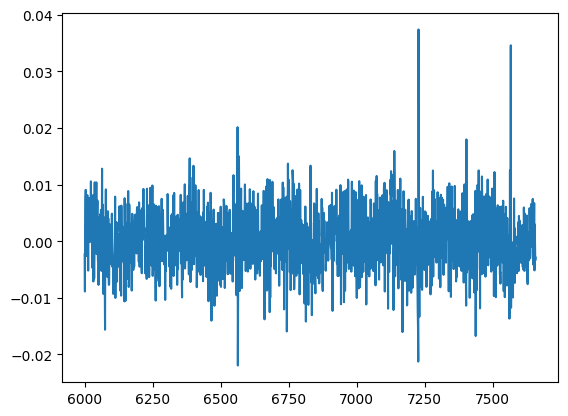

In [61]:
plt.plot(residual_rolling)

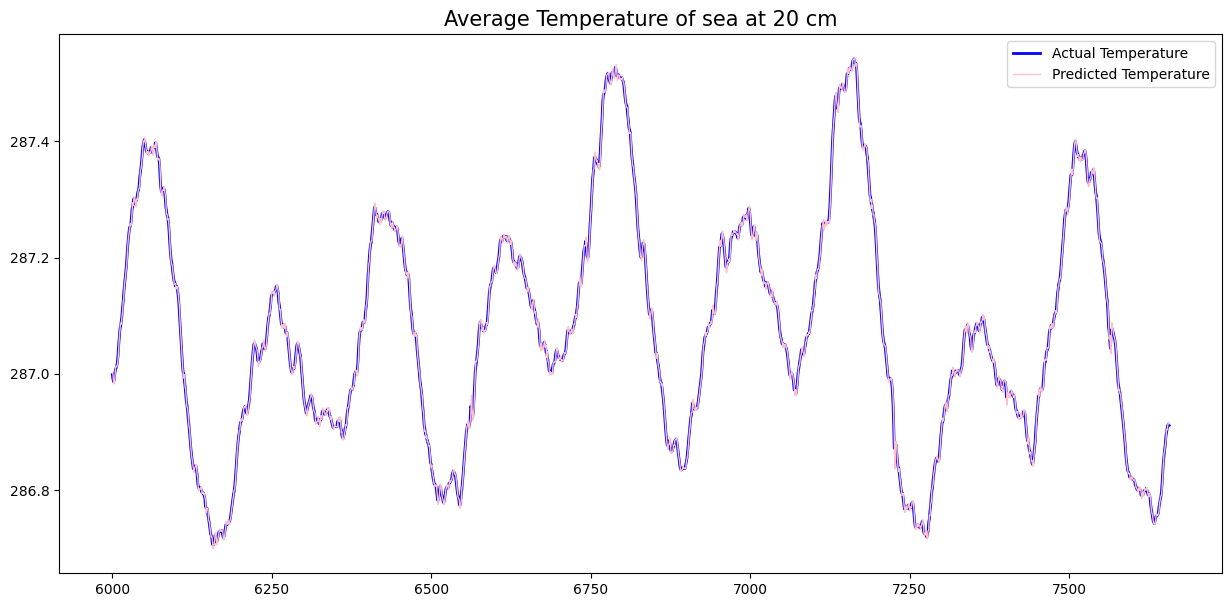

In [62]:
plt.figure(figsize=(15,7))
plt.plot(testing.Temperature, label = "Actual Temperature", linewidth=2, color = "blue" )
plt.plot(prediction_rolling, label = "Predicted Temperature", linewidth=1, color = "pink")
plt.title("Average Temperature of sea at 20 cm", fontsize=15)
plt.legend()


In [64]:
a = [5,3,4]

In [65]:
min(a)

3

In [67]:
np.sort(a)

array([3, 4, 5])